In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
img_gen = ImageDataGenerator(rescale = 1/255)

In [3]:
train_set = img_gen.flow_from_directory(directory = 'Emotion/train',
                                        target_size = (64,64),
                                        batch_size = 32,
                                        class_mode = 'sparse')

Found 28709 images belonging to 7 classes.


In [4]:
train_set.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [5]:
test_set = img_gen.flow_from_directory(directory = 'Emotion/test',
                                       target_size = (64,64),
                                       batch_size = 32,
                                       class_mode = 'sparse')

Found 7179 images belonging to 7 classes.


In [6]:
lv = []
for i,v in enumerate(test_set.class_indices):
    lv.append(v)

In [7]:
lv

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [8]:
img, label = next(train_set)

In [9]:
img[0].shape

(64, 64, 3)

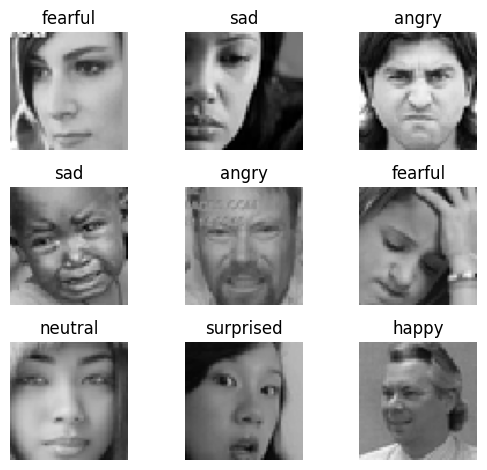

In [10]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(img[i])
    plt.title(lv[int(label[i])])
    plt.axis('off')
    plt.tight_layout()

In [11]:
model = Sequential([
    Conv2D(64,(4,4),input_shape=(64,64,3),activation='relu'),
    MaxPooling2D((4,4),4),
    Conv2D(64,(4,4),activation='relu'),
    MaxPooling2D((2,2),2),
    Flatten(),
    Dense(1024,activation = 'relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1024,activation = 'relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(7,activation = 'softmax')
])

C:\Users\Brijesh AH\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [13]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

In [77]:
model.fit(train_set, epochs = 10, callbacks = [early_stop])

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 121s 135ms/step - accuracy: 0.7568 - loss: 0.6541
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.7825 - loss: 0.5955
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 119s 132ms/step - accuracy: 0.7987 - loss: 0.5558
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 119s 133ms/step - accuracy: 0.8113 - loss: 0.5120
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 119s 132ms/step - accuracy: 0.8390 - loss: 0.4519
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 119s 132ms/step - accuracy: 0.8410 - loss: 0.4405
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 117s 130ms/step - accuracy: 0.8489 - loss: 0.4261
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.8354 - loss: 0.4646
Epoch 9/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 120s 133ms/step - accuracy: 0.8631 - loss: 0.3804
Epoch 10/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 120s 133ms/step - accuracy: 0.8760 - loss: 0.3452


In [46]:
model = load_model('Deployment/model.h5')

In [15]:
img, label = next(test_set)

In [16]:
y_predict = []
for i in model.predict(img):
    y_predict.append(np.argmax(i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


In [17]:
y_pred = np.array(y_predict)

In [18]:
label = label.astype(int)

<Axes: >

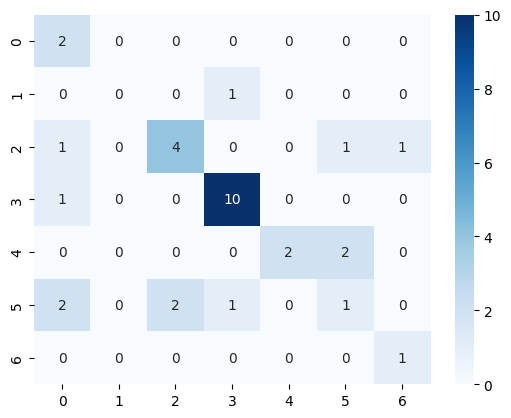

In [19]:
sns.heatmap(confusion_matrix(y_pred,label),annot = True, fmt = 'd', cmap = 'Blues')

In [39]:
def inference(path):
    from tensorflow.keras.preprocessing import image
    img = load_img(path,target_size = (64,64))
    simg = load_img(path,target_size = (512,512))
    plt.imshow(simg)
    img = image.img_to_array(img)
    img = img / 255
    img = np.expand_dims(img,axis = 0)
    print(lv[np.argmax(model.predict(img))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
fearful


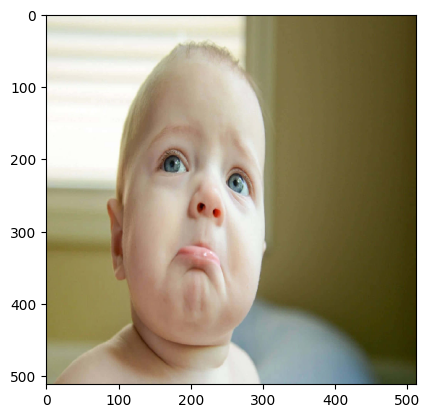

In [42]:
inference('sad-face-pictures-qm02f8bfvzhxyf1y.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
fearful


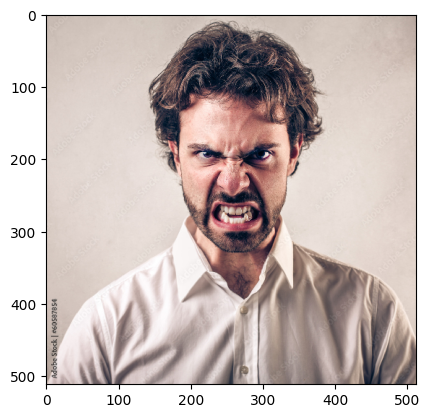

In [43]:
inference('1000_F_60587854_dm0AgQ2xWPRRnsZeNubLM9yY5omv2TxV.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
angry


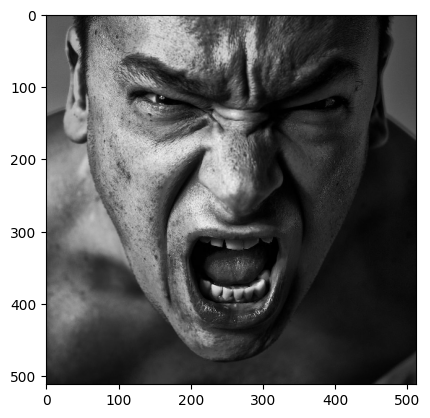

In [44]:
inference("56831e52417cc9f8aa9ee634739fd7d2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
fearful


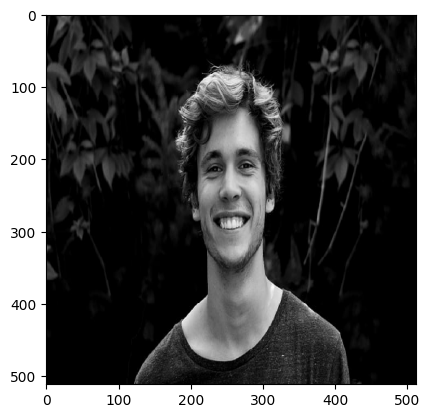

In [45]:
inference("smiling-happiness-happy-black-and-white.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
neutral


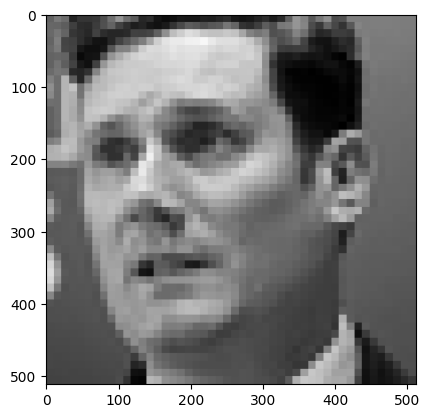

In [29]:
inference("Emotion/train/neutral/im73.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
sad


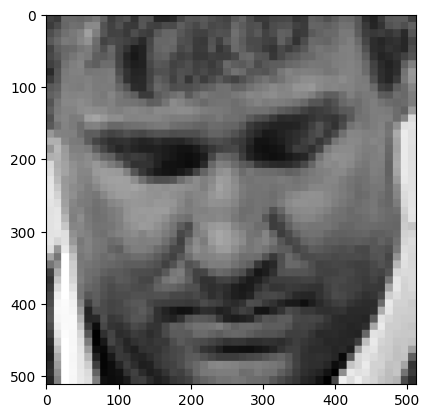

In [40]:
inference("Emotion/train/sad/im52.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
surprised


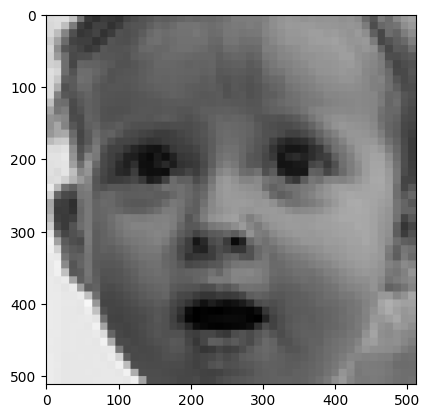

In [41]:
inference("Emotion/train/surprised/im26.png")